In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url ='http://bit.ly/drinksbycountry'

In [4]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [5]:
pd.read_table(url, sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [6]:
data=pd.read_csv("beer-servings.csv")

In [7]:
# data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data=pd.read_csv("beer-servings.csv", index_col='Unnamed: 0')

In [9]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [10]:
data.shape

(193, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [12]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [13]:
# data.isnull().sum() # we can use  2 codes for finding null values

# Filling Missing Values

In [14]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [15]:
data.columns


Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [16]:
num_cols = data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [17]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [20]:
type(num_cols)

numpy.ndarray

In [21]:
num_cols = pd.DataFrame(num_cols, columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [22]:
type(num_cols)

pandas.core.frame.DataFrame

In [23]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [24]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [25]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'], axis=1,inplace=True)

In [26]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [27]:
data=pd.concat([num_cols,data],axis=1)

In [28]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [29]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In [30]:
data=pd.read_csv("beer-servings.csv", index_col='Unnamed: 0')

In [31]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [32]:
#Method 2

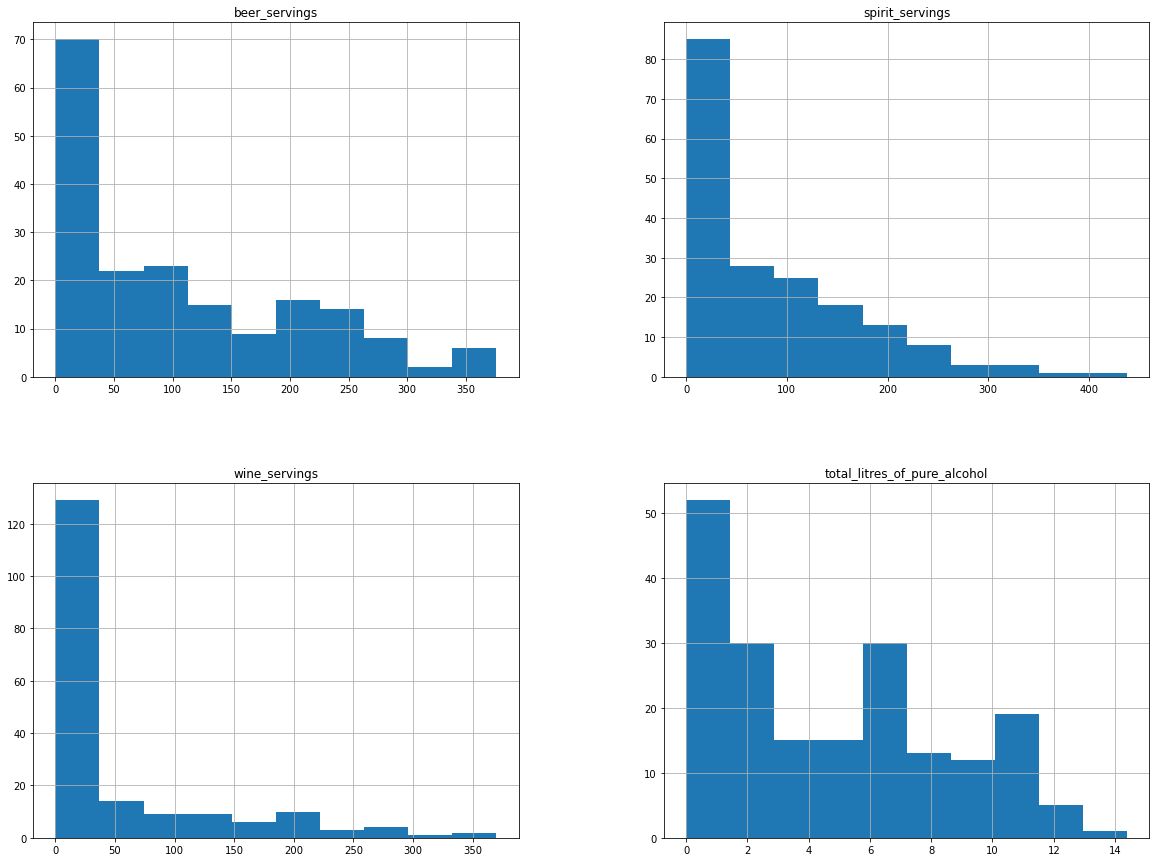

In [33]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [34]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [35]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())

In [36]:
data['beer_servings'].isna().sum()

0

In [37]:
for i in ['spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']: 
    data[i] = data[i].fillna(data[i].median())

In [38]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# Managing Outliers

Text(0.5, 1.0, 'Boxplot of beer_servings')

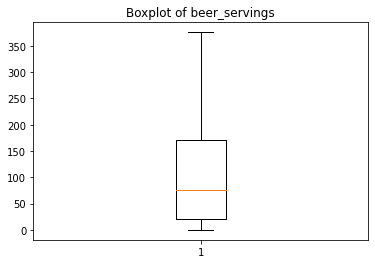

In [39]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of beer_servings')

Text(0.5, 1.0, 'Boxplot of spirit_servings')

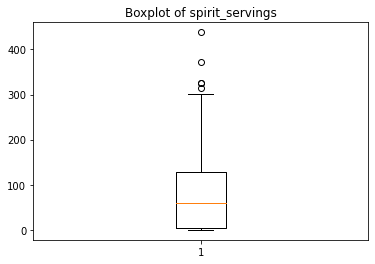

In [40]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of spirit_servings')

In [41]:
Q1 = np.percentile(data['spirit_servings'], 25 ,interpolation='midpoint')
Q2 = np.percentile(data['spirit_servings'], 50 ,interpolation='midpoint')
Q3 = np.percentile(data['spirit_servings'], 75 ,interpolation='midpoint')


In [42]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [43]:
data['spirit_servings'].median()

60.0

In [44]:
IQR=Q3-Q1

In [45]:
print(IQR)

123.0


In [46]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [47]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [48]:
outlier =[]
for x in data['spirit_servings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [49]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [50]:
# to drop outlier( this step is not recommanded)

In [51]:
ind = data['spirit_servings']>up_lim

In [52]:
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [53]:
data.drop([15, 68, 73, 141, 144], inplace=True)

In [54]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1,Albania,89.0,132.0,54.0,4.90,Europe
2,Algeria,25.0,0.0,14.0,0.70,Africa
3,Andorra,245.0,138.0,312.0,12.40,Europe
4,Angola,217.0,57.0,45.0,5.90,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
6,Argentina,76.0,25.0,221.0,8.30,South America
7,Armenia,21.0,179.0,11.0,3.80,Europe
8,Australia,261.0,72.0,212.0,10.40,Oceania
9,Austria,279.0,75.0,191.0,9.70,Europe


Text(0.5, 1.0, 'Boxplot of wine_servings')

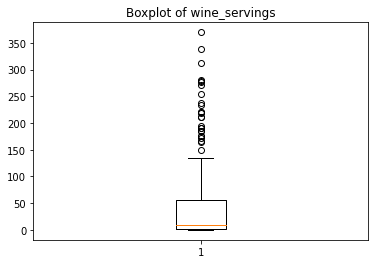

In [55]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of wine_servings')

In [56]:
Q1 = np.percentile(data['wine_servings'], 25 ,interpolation='midpoint')
Q2 = np.percentile(data['wine_servings'], 50 ,interpolation='midpoint')
Q3 = np.percentile(data['wine_servings'], 75 ,interpolation='midpoint')

In [57]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
57.5


In [58]:
data['wine_servings'].median()

9.0

In [59]:
IQR=Q3-Q1

In [60]:
print(IQR)

56.5


In [61]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [62]:
print(low_lim)
print(up_lim)

-83.75
142.25


In [63]:
outlier =[]
for x in data['wine_servings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [64]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [65]:
ind = data['wine_servings']>up_lim

In [66]:
data.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

Text(0.5, 1.0, 'Boxplot of total_litres_of_pure_alcohol')

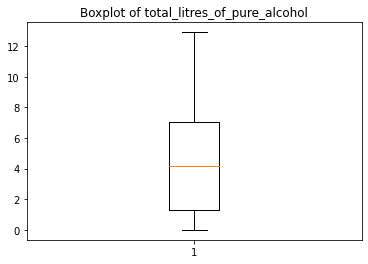

In [67]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Boxplot of total_litres_of_pure_alcohol')

In [79]:
#There are no outliers in total litres of pure alcohol

In [80]:
Q1 = np.percentile(data['total_litres_of_pure_alcohol'], 25 ,interpolation='midpoint')
Q2 = np.percentile(data['total_litres_of_pure_alcohol'], 50 ,interpolation='midpoint')
Q3 = np.percentile(data['total_litres_of_pure_alcohol'], 75 ,interpolation='midpoint')

In [81]:
print(Q1)
print(Q2)
print(Q3)

1.25
4.2
7.05


In [82]:
data['total_litres_of_pure_alcohol'].median()

4.2

In [83]:
IQR=Q3-Q1

In [84]:
print(IQR)

5.8


In [85]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [86]:
print(low_lim)
print(up_lim)

-7.449999999999999
15.75


In [87]:
outlier =[]
for x in data['total_litres_of_pure_alcohol']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [88]:
outlier

[]

In [89]:
ind = data['total_litres_of_pure_alcohol']>up_lim

In [90]:
data.loc[ind].index

Int64Index([], dtype='int64')